In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
image=cv2.imread("honey.jpeg")

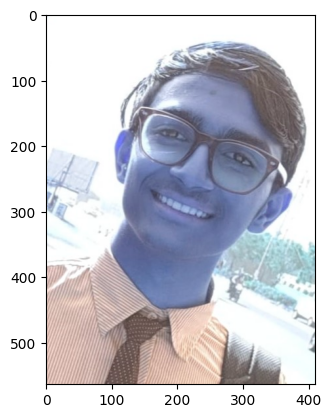

In [8]:
plt.imshow(image)

In [54]:
brightness=100
contrast=1
image2=cv2.addWeighted(image,contrast,np.zeros(image.shape,image.dtype),0,brightness)

In [56]:
cv2.imwrite("new.jpeg",image2)

True

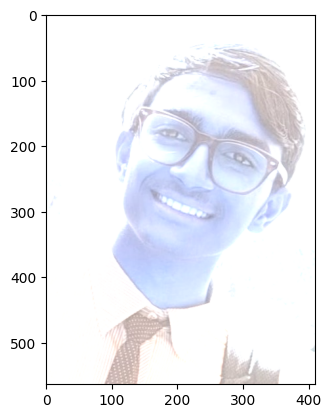

In [58]:
plt.imshow(image2)

In [87]:
kernal=np.array([[0,-2,0],
                 [-2,9,-2],
                 [0,-2,0]])

In [89]:
sharpened_img=cv2.filter2D(image,-1,kernal)

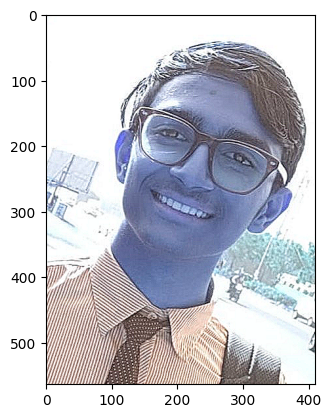

In [91]:
plt.imshow(sharpened_img)

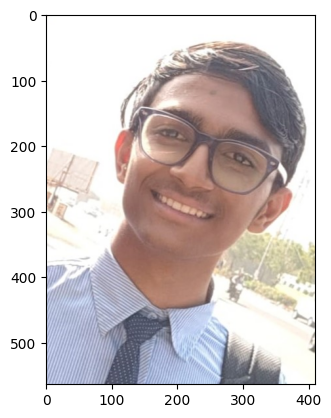

In [217]:
eimage=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(eimage)

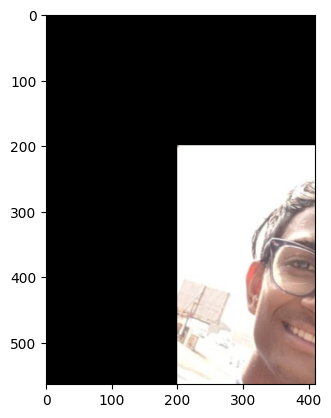

In [131]:
#Translation
rows,cols=eimage.shape[:2]
M=np.float32([[1,0,200],[0,1,200]])
trans_img=cv2.warpAffine(eimage,M,(cols,rows))
plt.imshow(trans_img)

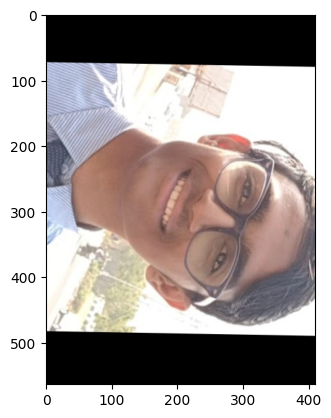

In [141]:
#rotation
rows,cols=eimage.shape[:2]
centre=(cols//2,rows//2)
M=cv2.getRotationMatrix2D(centre,359,1.0)
rotated_img=cv2.warpAffine(eimage,M,(cols,rows))
plt.imshow(rotated_img)

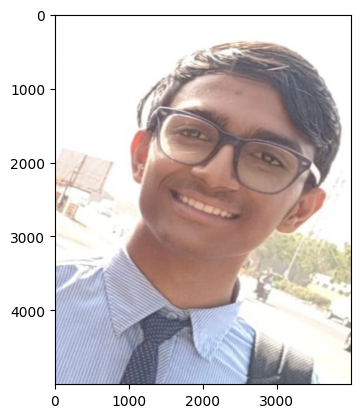

In [161]:
#resizing
resized_img=cv2.resize(eimage,(4000,5000))
plt.imshow(resized_img)

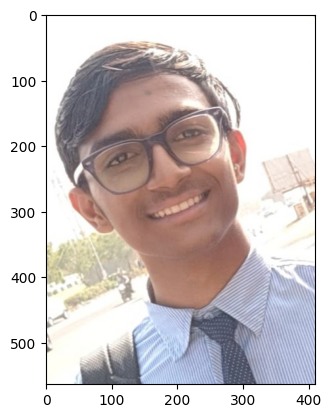

In [163]:
#flipping
flipped_img=cv2.flip(eimage,1)
plt.imshow(flipped_img)

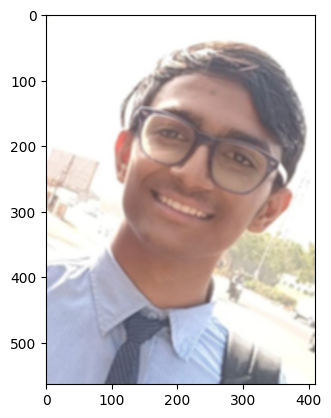

In [183]:
#gaussianblur
blur=cv2.blur(eimage,(5,5),0)
plt.imshow(blur)

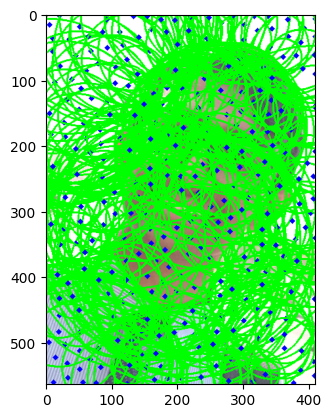

In [199]:
#circledetection
output=eimage.copy()
gray=cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)
circles=cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,
                        dp=1.2,
                        minDist=20,
                        param1=50,
                        param2=30,
                        minRadius=0,
                        maxRadius=0)

if circles is not None:
    circles=np.uint16(np.around(circles))
    for i in circles [0,:]:
        cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),2)
        cv2.circle(output,(i[0],i[1]),2,(0,0,255),3)
plt.imshow(output)                   

                   

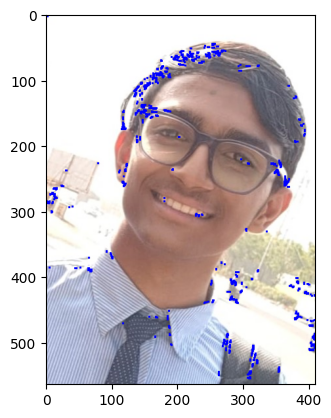

In [219]:
#harriscornerdetection
img=eimage.copy()
gray=np.float32(gray)
dst=cv2.cornerHarris(gray,blockSize=2,ksize=3,k=0.04)
dst=cv2.dilate(dst,None)
img[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(img)

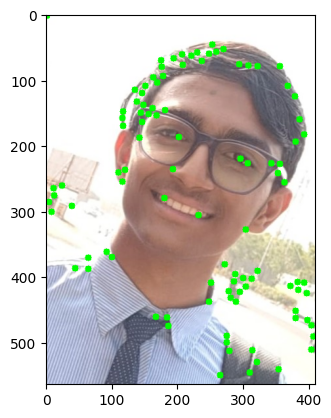

In [221]:
#shitomasi
img1=eimage.copy()
corners=cv2.goodFeaturesToTrack(gray,maxCorners=100,qualityLevel=0.01,minDistance=10)
corners=np.int16(corners)
for i in corners:
    x,y=i.ravel()
    cv2.circle(img1,(x,y),5,(0,255,0),-1)

plt.imshow(img1)